# Long Short-Term Memory (LSTM)
Load a time-seris dataset. Split it into training and test sets. Train and test an LSTM model using Keras and TensorFlow. Check the documentation and sample codes to identify the most promising architectures and hyperparameters. A tutorial can be found [here.](https://keras.io/examples/timeseries/timeseries_weather_forecasting/)

## Importing Modules

In [1]:
import os
import zipfile

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2021-12-08 13:43:11.524309: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-08 13:43:11.524336: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-qsho1k3x because the default path (/home/mohammad/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Downloading the Dataset

In [2]:
uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
csv_path = "jena_climate_2009_2016.csv"

zip_path = tf.keras.utils.get_file(origin=uri, fname=csv_path)
zip_file = zipfile.ZipFile(zip_path)
zip_file.extractall()

df = pd.read_csv(csv_path)
df = df.set_index("Date Time")
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


## Preprocessing the Data

In [3]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))

features = normalize(df.values, train_split)
features = pd.DataFrame(features)
features.index = df.index
features.columns = df.columns
features.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,0.955451,-2.000020,-2.060649,-1.953135,1.047715,-1.319782,-1.497879,-0.788479,-1.500927,-1.503167,2.237658,-0.732997,-0.780272,-0.241025
01.01.2009 00:20:00,0.961528,-2.045185,-2.105453,-2.007509,1.053757,-1.332806,-1.519123,-0.790561,-1.519521,-1.524154,2.287838,-0.936002,-0.888510,-0.425626
01.01.2009 00:30:00,0.956666,-2.056766,-2.116941,-2.011802,1.083965,-1.335410,-1.521483,-0.792642,-1.523239,-1.526486,2.298608,-1.283076,-1.265180,-0.021100
01.01.2009 00:40:00,0.954236,-2.033604,-2.092816,-1.977460,1.102091,-1.328898,-1.507321,-0.794724,-1.508364,-1.512494,2.272906,-1.184847,-1.321463,0.279731
01.01.2009 00:50:00,0.954236,-2.028972,-2.089370,-1.973168,1.096049,-1.327596,-1.504960,-0.794724,-1.508364,-1.510162,2.268256,-1.197944,-1.265180,0.465471


## Splitting the Data into Training and Test Sets

### Training Set

In [4]:
past = 720   # Last 120 hours = 5 days
future = 72   # Next 12 hours

train_data = features.iloc[0:train_split]
x_train = train_data.values 

start = past + future
end = start + train_split

y_train = features.iloc[start:end, :]["T (degC)"]

step = 6
batch_size = 256
sequence_length = int(past / step)

dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

2021-12-08 13:59:35.041593: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-08 13:59:35.041630: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-08 13:59:35.041657: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ubuntu-1804-bionic-64-minimal): /proc/driver/nvidia/version does not exist
2021-12-08 13:59:35.042046: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Test Set

In [5]:
val_data = features.iloc[train_split:]

x_end = len(val_data) - past - future
label_start = train_split + past + future

x_val = val_data.iloc[:x_end, :].values
y_val = features.iloc[label_start:, :]["T (degC)"]

dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 14)
Target shape: (256,)


2021-12-08 14:00:57.129285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


## Building the Model

In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                6016      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [7]:
epochs = 1
learning_rate = 0.001

es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath="model_checkpoint.h5",
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

1172/1172 [==============================] - 96s 81ms/step - loss: 0.2300 - val_loss: 0.1805

Epoch 00001: val_loss improved from inf to 0.18054, saving model to model_checkpoint.h5


## Plotting the Predictions

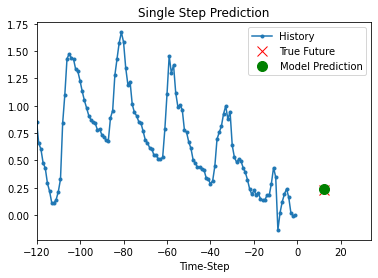

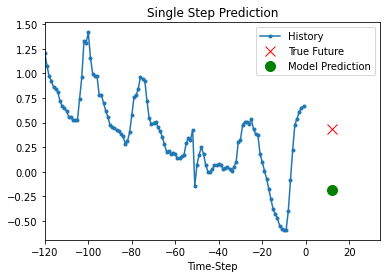

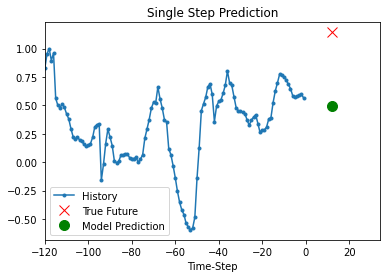

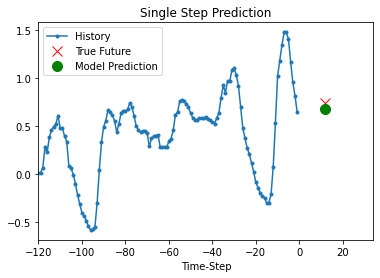

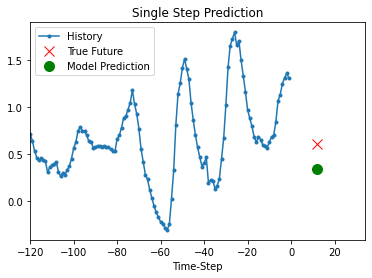

In [8]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )